In [0]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection
import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
mnist = input_data.read_data_sets("MNIST_data/")
X_m = mnist.train.images
y = mnist.train.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Principal Component Analysis

In [0]:
pca = PCA(n_components=784, whiten = False, random_state = 2019)
X_pca = pca.fit_transform(X_m)
X_pca_reconst = pca.inverse_transform(X_pca)

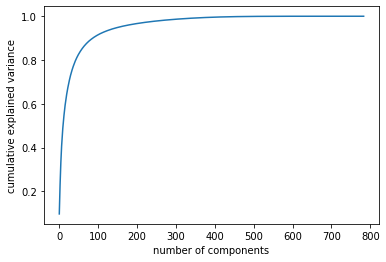

In [0]:
pca = PCA().fit(X_m)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

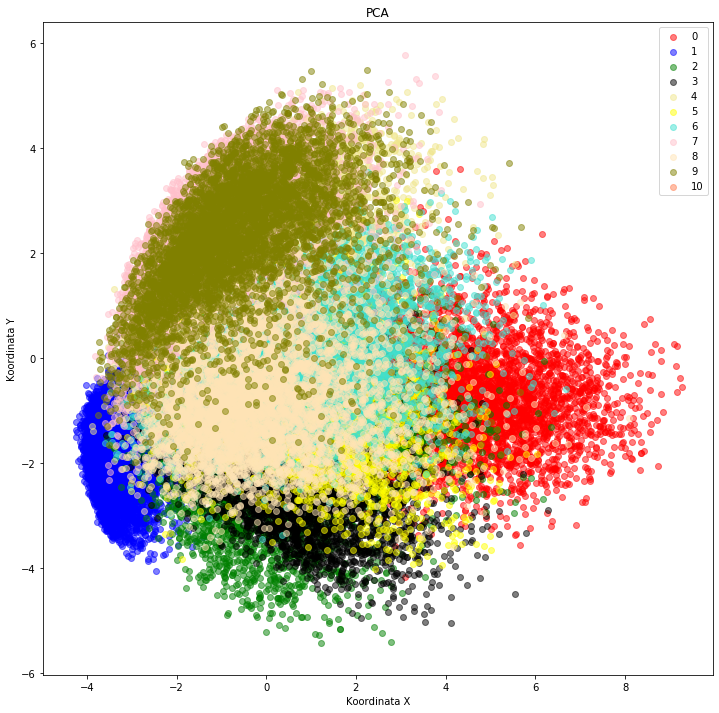

In [0]:
plt.figure(figsize=(12,12))

plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.5,label='1')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], color='green', alpha=0.5,label='2')
plt.scatter(X_pca[y==3, 0], X_pca[y==3, 1], color='black', alpha=0.5,label='3')
plt.scatter(X_pca[y==4, 0], X_pca[y==4, 1], color='khaki', alpha=0.5,label='4')
plt.scatter(X_pca[y==5, 0], X_pca[y==5, 1], color='yellow', alpha=0.5,label='5')
plt.scatter(X_pca[y==6, 0], X_pca[y==6, 1], color='turquoise', alpha=0.5,label='6')
plt.scatter(X_pca[y==7, 0], X_pca[y==7, 1], color='pink', alpha=0.5,label='7')
plt.scatter(X_pca[y==8, 0], X_pca[y==8, 1], color='moccasin', alpha=0.5,label='8')
plt.scatter(X_pca[y==9, 0], X_pca[y==9, 1], color='olive', alpha=0.5,label='9')
plt.scatter(X_pca[y==10, 0], X_pca[y==10, 1], color='coral', alpha=0.5,label='10')
plt.title("PCA")
plt.ylabel('Koordinata Y')
plt.xlabel('Koordinata X')
plt.legend()
plt.show()

### Incremental PCA
The incremental principal component analysis is a variant of the ACP It only keeps the most significant singular vectors to project the data into a space to
reduced size.

In [0]:
n_batches = 256
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_m, n_batches):
  inc_pca.partial_fit(X_batch)
X_ipca = inc_pca.transform(X_m)
X_ipca_reconst = inc_pca.inverse_transform(X_ipca)

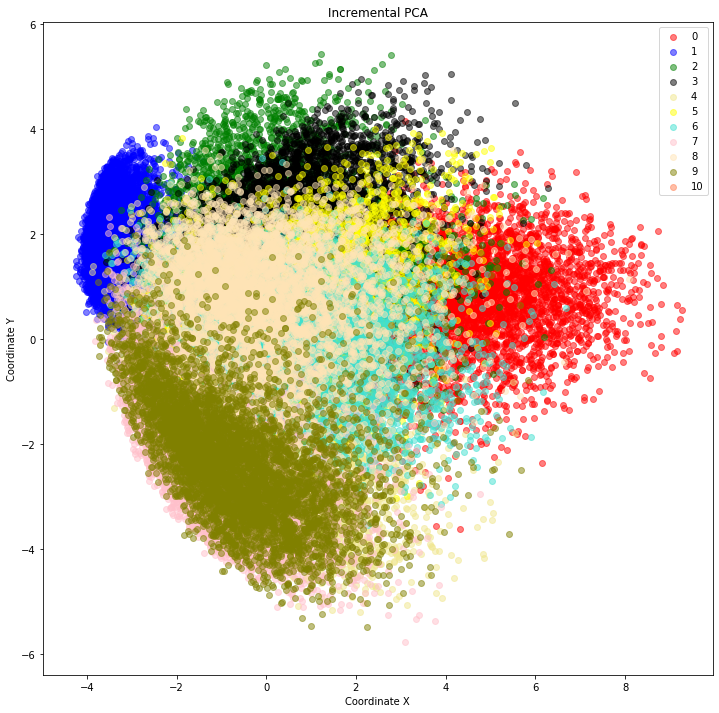

In [0]:
plt.figure(figsize=(12,12))

plt.scatter(X_ipca[y==0, 0], X_ipca[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_ipca[y==1, 0], X_ipca[y==1, 1], color='blue', alpha=0.5,label='1')
plt.scatter(X_ipca[y==2, 0], X_ipca[y==2, 1], color='green', alpha=0.5,label='2')
plt.scatter(X_ipca[y==3, 0], X_ipca[y==3, 1], color='black', alpha=0.5,label='3')
plt.scatter(X_ipca[y==4, 0], X_ipca[y==4, 1], color='khaki', alpha=0.5,label='4')
plt.scatter(X_ipca[y==5, 0], X_ipca[y==5, 1], color='yellow', alpha=0.5,label='5')
plt.scatter(X_ipca[y==6, 0], X_ipca[y==6, 1], color='turquoise', alpha=0.5,label='6')
plt.scatter(X_ipca[y==7, 0], X_ipca[y==7, 1], color='pink', alpha=0.5,label='7')
plt.scatter(X_ipca[y==8, 0], X_ipca[y==8, 1], color='moccasin', alpha=0.5,label='8')
plt.scatter(X_ipca[y==9, 0], X_ipca[y==9, 1], color='olive', alpha=0.5,label='9')
plt.scatter(X_ipca[y==10, 0],X_ipca[y==10, 1], color='coral', alpha=0.5,label='10')
plt.title("Incremental PCA")
plt.ylabel('Coordinate Y')
plt.xlabel('Coordinate X')
plt.legend()
plt.show()

### Kernel PCA
KPCA making it possible to perform complex nonlinear projections for dimensionality reduction.
For example, the following code uses Scikit-Learn’s KernelPCA class to perform kPCA with an RBF kernel.

In [0]:
kpca = KernelPCA(kernel="rbf",n_components=154, gamma=None, fit_inverse_transform=True, random_state = 2019, n_jobs=1)
kpca.fit(X_m[:10000,:])
X_kpca = kpca.transform(X_m)
X_kpca_reconst = kpca.inverse_transform(X_kpca)

In [0]:
X_ipca=X_kpca   # olakšano crtanje (svodjenje na prethodni deo koda za crtanje X_ipca)

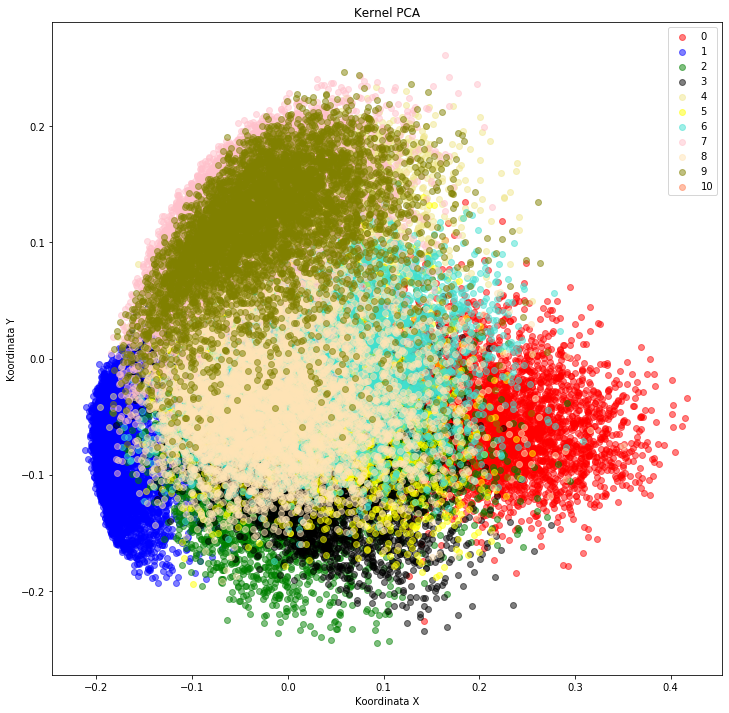

In [0]:
plt.figure(figsize=(12,12))

plt.scatter(X_ipca[y==0, 0], X_ipca[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_ipca[y==1, 0], X_ipca[y==1, 1], color='blue', alpha=0.5,label='1')
plt.scatter(X_ipca[y==2, 0], X_ipca[y==2, 1], color='green', alpha=0.5,label='2')
plt.scatter(X_ipca[y==3, 0], X_ipca[y==3, 1], color='black', alpha=0.5,label='3')
plt.scatter(X_ipca[y==4, 0], X_ipca[y==4, 1], color='khaki', alpha=0.5,label='4')
plt.scatter(X_ipca[y==5, 0], X_ipca[y==5, 1], color='yellow', alpha=0.5,label='5')
plt.scatter(X_ipca[y==6, 0], X_ipca[y==6, 1], color='turquoise', alpha=0.5,label='6')
plt.scatter(X_ipca[y==7, 0], X_ipca[y==7, 1], color='pink', alpha=0.5,label='7')
plt.scatter(X_ipca[y==8, 0], X_ipca[y==8, 1], color='moccasin', alpha=0.5,label='8')
plt.scatter(X_ipca[y==9, 0], X_ipca[y==9, 1], color='olive', alpha=0.5,label='9')
plt.scatter(X_ipca[y==10, 0],X_ipca[y==10, 1], color='coral', alpha=0.5,label='10')
plt.title("Kernel PCA")
plt.ylabel('Koordinata Y')
plt.xlabel('Koordinata X')
plt.legend()
plt.show()

## Sparse PCA
Sparse PCA uses the links between the ACP and the SVD to extract the main components by solving a lower-order matrix approximation problem.

In [0]:
sparsepca = SparsePCA(n_components=154, alpha=0.0001, random_state=2019, n_jobs=-1)
sparsepca.fit(X_m[:10000,:])
X_spacepca = sparsepca.transform(X_m)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


In [0]:
X_ipca=X_spacepca

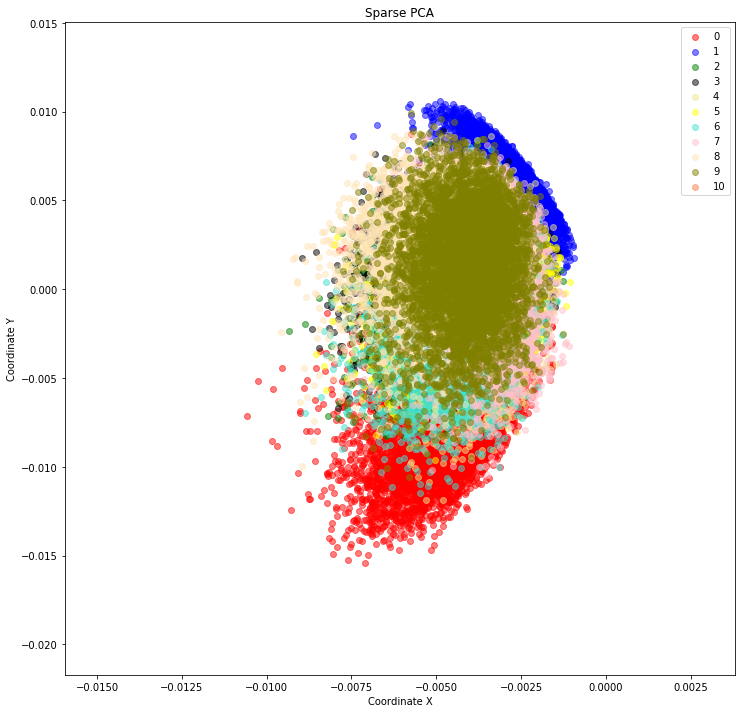

In [0]:
plt.figure(figsize=(12,12))

plt.scatter(X_ipca[y==0, 0], X_ipca[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_ipca[y==1, 0], X_ipca[y==1, 1], color='blue', alpha=0.5,label='1')
plt.scatter(X_ipca[y==2, 0], X_ipca[y==2, 1], color='green', alpha=0.5,label='2')
plt.scatter(X_ipca[y==3, 0], X_ipca[y==3, 1], color='black', alpha=0.5,label='3')
plt.scatter(X_ipca[y==4, 0], X_ipca[y==4, 1], color='khaki', alpha=0.5,label='4')
plt.scatter(X_ipca[y==5, 0], X_ipca[y==5, 1], color='yellow', alpha=0.5,label='5')
plt.scatter(X_ipca[y==6, 0], X_ipca[y==6, 1], color='turquoise', alpha=0.5,label='6')
plt.scatter(X_ipca[y==7, 0], X_ipca[y==7, 1], color='pink', alpha=0.5,label='7')
plt.scatter(X_ipca[y==8, 0], X_ipca[y==8, 1], color='moccasin', alpha=0.5,label='8')
plt.scatter(X_ipca[y==9, 0], X_ipca[y==9, 1], color='olive', alpha=0.5,label='9')
plt.scatter(X_ipca[y==10, 0],X_ipca[y==10, 1], color='coral', alpha=0.5,label='10')
plt.title("Sparse PCA")
plt.ylabel('Coordinate Y')
plt.xlabel('Coordinate X')
plt.legend()
plt.show()

### T-distributed Stochastic Neighbor Embedding [T-SNE]
T-SNE reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space.


In [0]:
tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
X_tsne = tsne.fit_transform(X_m[:10000,:])

In [0]:
X_ipca=[]
X_ipca=X_tsne
y=y[:10000]
X_ipca.shape
y.shape

(10000,)

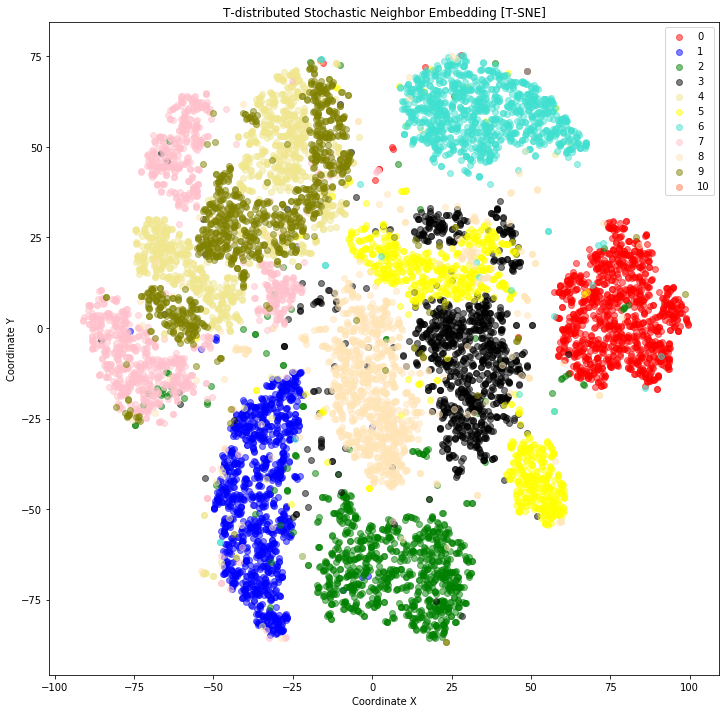

In [0]:
plt.figure(figsize=(12,12))

plt.scatter(X_ipca[y==0, 0], X_ipca[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_ipca[y==1, 0], X_ipca[y==1, 1], color='blue', alpha=0.5,label='1')
plt.scatter(X_ipca[y==2, 0], X_ipca[y==2, 1], color='green', alpha=0.5,label='2')
plt.scatter(X_ipca[y==3, 0], X_ipca[y==3, 1], color='black', alpha=0.5,label='3')
plt.scatter(X_ipca[y==4, 0], X_ipca[y==4, 1], color='khaki', alpha=0.5,label='4')
plt.scatter(X_ipca[y==5, 0], X_ipca[y==5, 1], color='yellow', alpha=0.5,label='5')
plt.scatter(X_ipca[y==6, 0], X_ipca[y==6, 1], color='turquoise', alpha=0.5,label='6')
plt.scatter(X_ipca[y==7, 0], X_ipca[y==7, 1], color='pink', alpha=0.5,label='7')
plt.scatter(X_ipca[y==8, 0], X_ipca[y==8, 1], color='moccasin', alpha=0.5,label='8')
plt.scatter(X_ipca[y==9, 0], X_ipca[y==9, 1], color='olive', alpha=0.5,label='9')
plt.scatter(X_ipca[y==10, 0],X_ipca[y==10, 1], color='coral', alpha=0.5,label='10')
plt.title("T-distributed Stochastic Neighbor Embedding [T-SNE]")
plt.ylabel('Coordinate Y')
plt.xlabel('Coordinate X')
plt.legend()
plt.show()

Autoencoders
Autoencoders are artificial neural networks capable of learning efficient representations of the input data, called codings, without any supervision (i.e., the training set is unlabeled).

In [0]:
m = Sequential()
m.add(Dense(512,  activation='elu', input_shape=(784,)))
m.add(Dense(128,  activation='elu'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(128,  activation='elu'))
m.add(Dense(512,  activation='elu'))
m.add(Dense(784,  activation='sigmoid'))
m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(X_m, X_m, batch_size=128, epochs=5, verbose=1)

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(X_m)
Renc = m.predict(X_m)








Epoch 1/5





55000/55000 [==============================] - 13s 232us/step - loss: 0.0574
Epoch 2/5
55000/55000 [==============================] - 11s 205us/step - loss: 0.0471
Epoch 3/5
55000/55000 [==============================] - 11s 204us/step - loss: 0.0439
Epoch 4/5
55000/55000 [==============================] - 11s 202us/step - loss: 0.0423
Epoch 5/5
55000/55000 [==============================] - 11s 200us/step - loss: 0.0412


In [0]:
Zenc.shape

(55000, 2)

In [0]:
y.shape

(55000,)

In [0]:
X_ipca=[]
X_ipca=Zenc

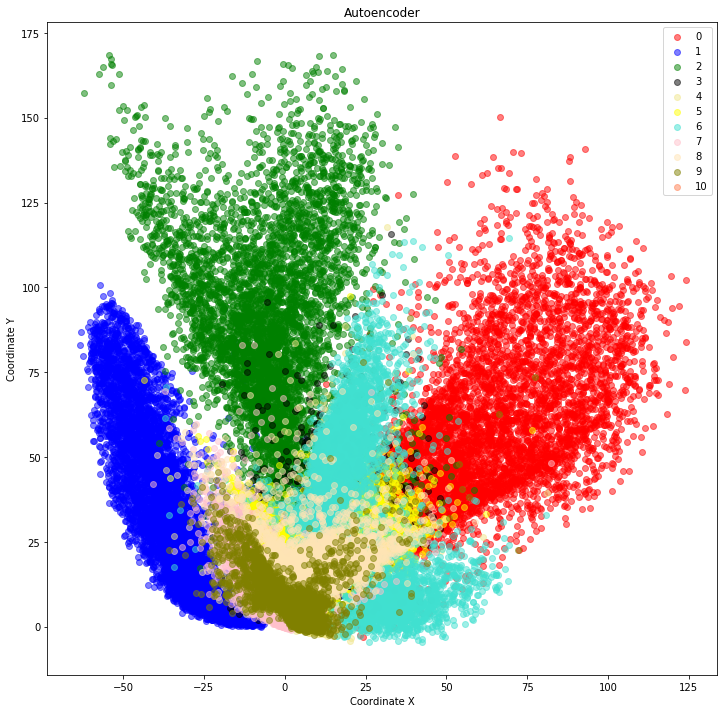

In [0]:
plt.figure(figsize=(12,12))

plt.scatter(X_ipca[y==0, 0], X_ipca[y==0, 1], color='red', alpha=0.5,label='0')
plt.scatter(X_ipca[y==1, 0], X_ipca[y==1, 1], color='blue', alpha=0.5,label='1')
plt.scatter(X_ipca[y==2, 0], X_ipca[y==2, 1], color='green', alpha=0.5,label='2')
plt.scatter(X_ipca[y==3, 0], X_ipca[y==3, 1], color='black', alpha=0.5,label='3')
plt.scatter(X_ipca[y==4, 0], X_ipca[y==4, 1], color='khaki', alpha=0.5,label='4')
plt.scatter(X_ipca[y==5, 0], X_ipca[y==5, 1], color='yellow', alpha=0.5,label='5')
plt.scatter(X_ipca[y==6, 0], X_ipca[y==6, 1], color='turquoise', alpha=0.5,label='6')
plt.scatter(X_ipca[y==7, 0], X_ipca[y==7, 1], color='pink', alpha=0.5,label='7')
plt.scatter(X_ipca[y==8, 0], X_ipca[y==8, 1], color='moccasin', alpha=0.5,label='8')
plt.scatter(X_ipca[y==9, 0], X_ipca[y==9, 1], color='olive', alpha=0.5,label='9')
plt.scatter(X_ipca[y==10, 0],X_ipca[y==10, 1], color='coral', alpha=0.5,label='10')
plt.title("Autoencoder")
plt.ylabel('Coordinate Y')
plt.xlabel('Coordinate X')
plt.legend()
plt.show()

In [0]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's take a look at the principal axes that span this dataset. Because this is a large dataset, we will use RandomizedPCA—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). We will take a look at the first 150 components:

In [0]:
!pip install from sklearn.decomposition import RandomizedPCA

ERROR: Could not find a version that satisfies the requirement from (from versions: none)
ERROR: No matching distribution found for from


In [0]:
#from sklearn.decomposition import RandomizedPCA
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

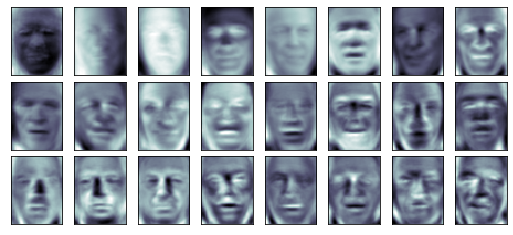

In [0]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

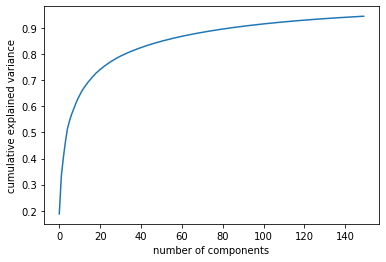

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data. To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

In [0]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

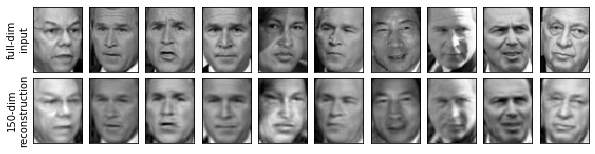

In [0]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection used in In-Depth: Support Vector Machines was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image. What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

### PCA for visualization: Hand-written digits
The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data. To see this, let's take a quick look at the application of PCA to the digits data we saw in In-Depth: Decision Trees and Random Forests.

We start by loading the data:

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [0]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

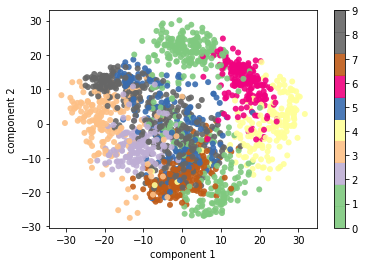

In [0]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

What do the components mean?
We can go a bit further here, and begin to ask what the reduced dimensions mean. This meaning can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$
One way we can think about this is in terms of a pixel basis. That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$
One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors. For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

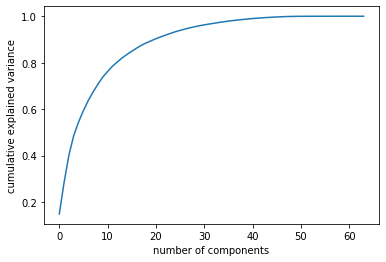

In [0]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');